## Lead scoring assignment

### Reading and understanding the data

In [1]:
#importing all necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
leadsc = pd.read_csv('Leads.csv') #reading the file
leadsc.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
leadsc.info() #we see that in certain columns, we have null values present which will be subject to treatment later on

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
leadsc.describe() #we can see some outliers in 'Page Views Per Visit', 'Total time spent on website' and 'Total Visits'

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Data cleaning

In [5]:
round(100*(leadsc.isnull().sum()/len(leadsc)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

#### We see that there are huge percentages of missing values in certain columns, hence we can drop those columns with missing values above 30%

In [6]:
leadsc = leadsc.drop(columns = ['Tags', 'Lead Quality','Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1)

In [7]:
leadsc.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,Mumbai,No,No,Modified


In [8]:
#we can also drop variable called country since they do not provide any meaningful insight and also have ~27% missing values
leadsc = leadsc.drop(columns = 'Country',axis = 1)

In [9]:
leadsc.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,Mumbai,No,No,Modified


##### from the excel, we observed that there are 4 columns where there are values called "select" which might be because the prospect did not enter or select any particular option

the columns are
- Specialization
- How did you hear about X Education
- Lead Profile
- City


In [10]:
#converting select values to 'Nan'
#have not changed 'Lead Profile' since it has already been removed due to excessive missing values

leadsc['Specialization'] = leadsc['Specialization'].replace('Select', np.nan)
leadsc['How did you hear about X Education'] = leadsc['How did you hear about X Education'].replace('Select', np.nan)
leadsc['City'] = leadsc['City'].replace('Select', np.nan)

In [11]:
#checking for missing values again since columns have been modified
round(100*(leadsc.isnull().sum()/len(leadsc)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [12]:
# further dropping the columns which have missing values excess of 30%

leadsc = leadsc.drop(columns = ['Specialization','How did you hear about X Education','City'],axis = 1)
leadsc.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,No,No,Modified


In [13]:
leadsc['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [14]:
#for the above, we see that google has different cases, hence converting the smmall case ones to the first type from the above table
leadsc['Lead Source'] = leadsc['Lead Source'].replace('google', 'Google')

In [15]:
round(100*(leadsc.isnull().sum()/len(leadsc)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

#### now we will be treating the missing values

In [16]:
round(100*leadsc['Lead Source'].value_counts()/leadsc['Lead Source'].value_counts().sum(),2)

Google               31.21
Direct Traffic       27.63
Olark Chat           19.07
Organic Search       12.54
Reference             5.80
Welingak Website      1.54
Referral Sites        1.36
Facebook              0.60
bing                  0.07
Click2call            0.04
Social Media          0.02
Live Chat             0.02
Press_Release         0.02
Pay per Click Ads     0.01
blog                  0.01
WeLearn               0.01
welearnblog_Home      0.01
youtubechannel        0.01
testone               0.01
NC_EDM                0.01
Name: Lead Source, dtype: float64

In [17]:
# we see that almost 1/3rd of the data in Lead Source column has Google as the value, hence treating the missing values with the same value
leadsc['Lead Source'] = leadsc['Lead Source'].replace(np.nan, 'Google')

In [18]:
leadsc['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [19]:
# we see that for TotalVisits column, the median is 3, hence we can replace the missing values with the median

leadsc['TotalVisits'] = leadsc['TotalVisits'].replace(np.nan, 3)
leadsc.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9103.000000
mean,617188.435606,0.385390,3.438636,487.698268,2.362820
std,23405.995698,0.486714,4.819024,548.021466,2.161418
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


In [20]:
leadsc['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [21]:
# we see that for Page Views Per Visit column, the median is 2, hence we can replace the missing values with the median

leadsc['Page Views Per Visit'] = leadsc['Page Views Per Visit'].replace(np.nan, 2)
leadsc.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.438636,487.698268,2.357440
std,23405.995698,0.486714,4.819024,548.021466,2.145781
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


In [22]:
round(100*(leadsc.isnull().sum()/len(leadsc)), 2) #checking for null values

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       0.00
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Last Activity                                     1.11
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [23]:
leadsc['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [24]:
#for null values in Last Activity, we can create a new category as "Not Available" instead of null
leadsc['Last Activity'] = leadsc['Last Activity'].replace(np.nan, 'Last Activity NA')
leadsc['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Last Activity NA                 103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [25]:
round(100*(leadsc.isnull().sum()/len(leadsc)), 2) #checking for null values

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       0.00
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Last Activity                                     0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [26]:
leadsc['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [27]:
#since no info is there, we can set a new category called "Occupation NA"
leadsc['What is your current occupation'] = leadsc['What is your current occupation'].replace(np.nan, 'Occupation NA')
leadsc['What is your current occupation'].value_counts()

Unemployed              5600
Occupation NA           2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [28]:
leadsc['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [29]:
#we see that the category 'What matters most to you in choosing a course' is highly skewed and has ~30% missing values. Hence dropping
leadsc = leadsc.drop(columns = 'What matters most to you in choosing a course', axis = 1)
leadsc.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,No,No,Modified


In [30]:
round(100*(leadsc.isnull().sum()/len(leadsc)), 2) #checking for null values

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content       

#### hence the null values problem has been eradicated

In [31]:
leadsc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9240 non-null   object 
 1   Lead Number                               9240 non-null   int64  
 2   Lead Origin                               9240 non-null   object 
 3   Lead Source                               9240 non-null   object 
 4   Do Not Email                              9240 non-null   object 
 5   Do Not Call                               9240 non-null   object 
 6   Converted                                 9240 non-null   int64  
 7   TotalVisits                               9240 non-null   float64
 8   Total Time Spent on Website               9240 non-null   int64  
 9   Page Views Per Visit                      9240 non-null   float64
 10  Last Activity                       

In [32]:
round(leadsc['Do Not Call'].value_counts()*100/len(leadsc),2) #we see that the yes data is only 0.02 percent which indicates a high imbalance
#hence we can drop this column

No     99.98
Yes     0.02
Name: Do Not Call, dtype: float64

In [33]:
round(leadsc['Search'].value_counts()*100/len(leadsc),2) #we see that the yes data is only 0.15 percent which indicates a high imbalance
#hence we can drop this column

No     99.85
Yes     0.15
Name: Search, dtype: float64

In [34]:
round(leadsc['Magazine'].value_counts()*100/len(leadsc),2) #we see that the yes data is 0 percent which indicates a high imbalance
#hence we can drop this column

No    100.0
Name: Magazine, dtype: float64

In [35]:
round(leadsc['Newspaper Article'].value_counts()*100/len(leadsc),2) #we see that the yes data is 0.02 percent which indicates a high imbalance
#hence we can drop this column

No     99.98
Yes     0.02
Name: Newspaper Article, dtype: float64

In [36]:
round(leadsc['X Education Forums'].value_counts()*100/len(leadsc),2) #we see that the yes data is 0.01 percent which indicates a high imbalance
#hence we can drop this column

No     99.99
Yes     0.01
Name: X Education Forums, dtype: float64

In [37]:
round(leadsc['Newspaper'].value_counts()*100/len(leadsc),2) #we see that the yes data is 0.01 percent which indicates a high imbalance
#hence we can drop this column

No     99.99
Yes     0.01
Name: Newspaper, dtype: float64

In [38]:
round(leadsc['Digital Advertisement'].value_counts()*100/len(leadsc),2) #we see that the yes data is 0.04 percent which indicates a high imbalance
#hence we can drop this column

No     99.96
Yes     0.04
Name: Digital Advertisement, dtype: float64

In [39]:
round(leadsc['Through Recommendations'].value_counts()*100/len(leadsc),2) #we see that the yes data is 0.08 percent which indicates a high imbalance
#hence we can drop this column

No     99.92
Yes     0.08
Name: Through Recommendations, dtype: float64

In [40]:
round(leadsc['Receive More Updates About Our Courses'].value_counts()*100/len(leadsc),2) #we see that the yes data is 0 percent which indicates a high imbalance
#hence we can drop this column

No    100.0
Name: Receive More Updates About Our Courses, dtype: float64

In [41]:
round(leadsc['Update me on Supply Chain Content'].value_counts()*100/len(leadsc),2) #we see that the yes data is 0 percent which indicates a high imbalance
#hence we can drop this column

No    100.0
Name: Update me on Supply Chain Content, dtype: float64

In [42]:
round(leadsc['Get updates on DM Content'].value_counts()*100/len(leadsc),2) #we see that the yes data is 0 percent which indicates a high imbalance
#hence we can drop this column

No    100.0
Name: Get updates on DM Content, dtype: float64

In [43]:
round(leadsc['I agree to pay the amount through cheque'].value_counts()*100/len(leadsc),2) #we see that the yes data is 0 percent which indicates a high imbalance
#hence we can drop this column

No    100.0
Name: I agree to pay the amount through cheque, dtype: float64

In [44]:
#dropping extremely highly skewed columns
leadsc = leadsc.drop(columns = ['Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],axis=1)

In [45]:
leadsc.shape

(9240, 13)

In [46]:
#checking outliers in numerical data
leadsc.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.438636,487.698268,2.357440
std,23405.995698,0.486714,4.819024,548.021466,2.145781
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000


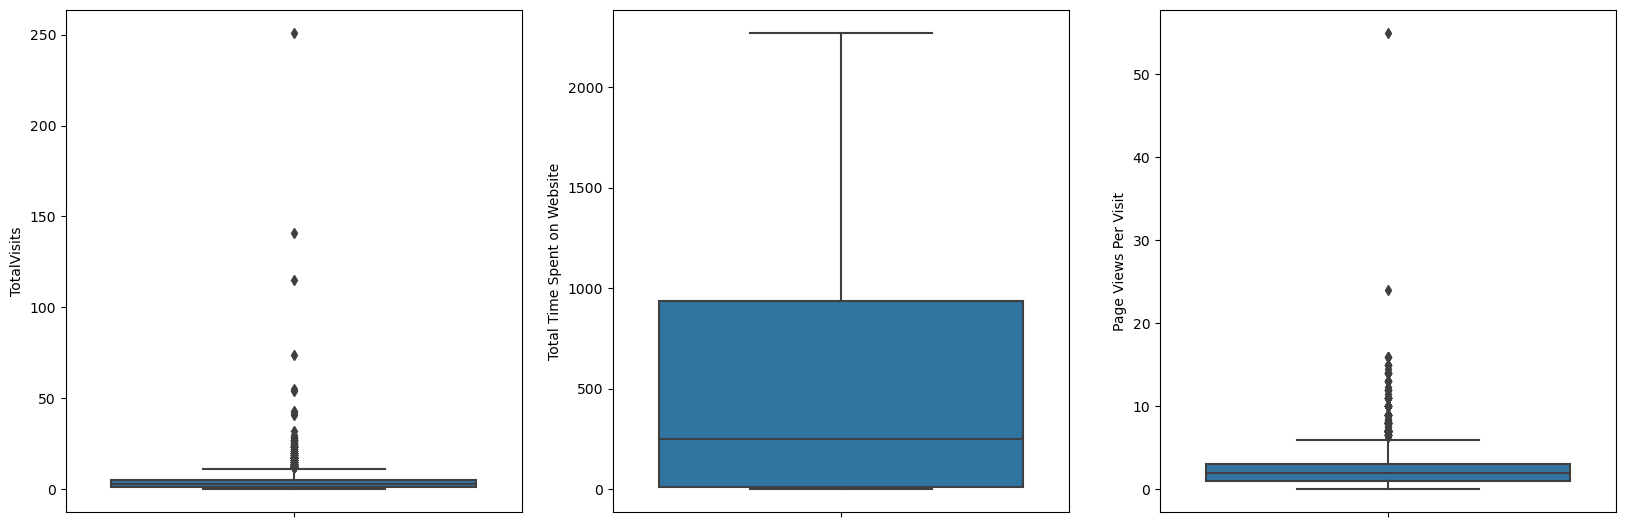

In [47]:
plt.figure(figsize=(20, 30))
plt.subplot(4,3,1)
sns.boxplot(y = 'TotalVisits', data = leadsc)
plt.subplot(4,3,2)
sns.boxplot(y = 'Total Time Spent on Website', data = leadsc)
plt.subplot(4,3,3)
sns.boxplot(y = 'Page Views Per Visit', data = leadsc)
plt.show()

In [48]:
#for Total Visits, we see that the outliers are pretty continuous till ~70, hence can remove values above that
leadsc = leadsc[(leadsc['TotalVisits']<100)]

In [49]:
leadsc.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9237.000000,9237.000000,9237.000000,9237.000000,9237.000000
mean,617188.910794,0.385407,3.384865,487.749378,2.356431
std,23408.155087,0.486718,3.632578,548.075462,2.144767
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596483.000000,0.000000,1.000000,12.000000,1.000000
50%,615481.000000,0.000000,3.000000,248.000000,2.000000
75%,637388.000000,1.000000,5.000000,936.000000,3.000000
max,660737.000000,1.000000,74.000000,2272.000000,55.000000


In [50]:
#the values for total time spent on website are in the range hence no outlier treatment required
#for page views per visit, we see values are continuous till ~20, hence imputing values above that

leadsc = leadsc[(leadsc['Page Views Per Visit']<20)] 

In [51]:
leadsc.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9235.000000,9235.000000,9235.000000,9235.000000,9235.000000
mean,617188.708392,0.385382,3.377044,487.657499,2.348387
std,23408.733341,0.486712,3.586626,548.024508,2.061578
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596480.500000,0.000000,1.000000,12.000000,1.000000
50%,615481.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.500000,1.000000,5.000000,936.000000,3.000000
max,660737.000000,1.000000,74.000000,2272.000000,16.000000


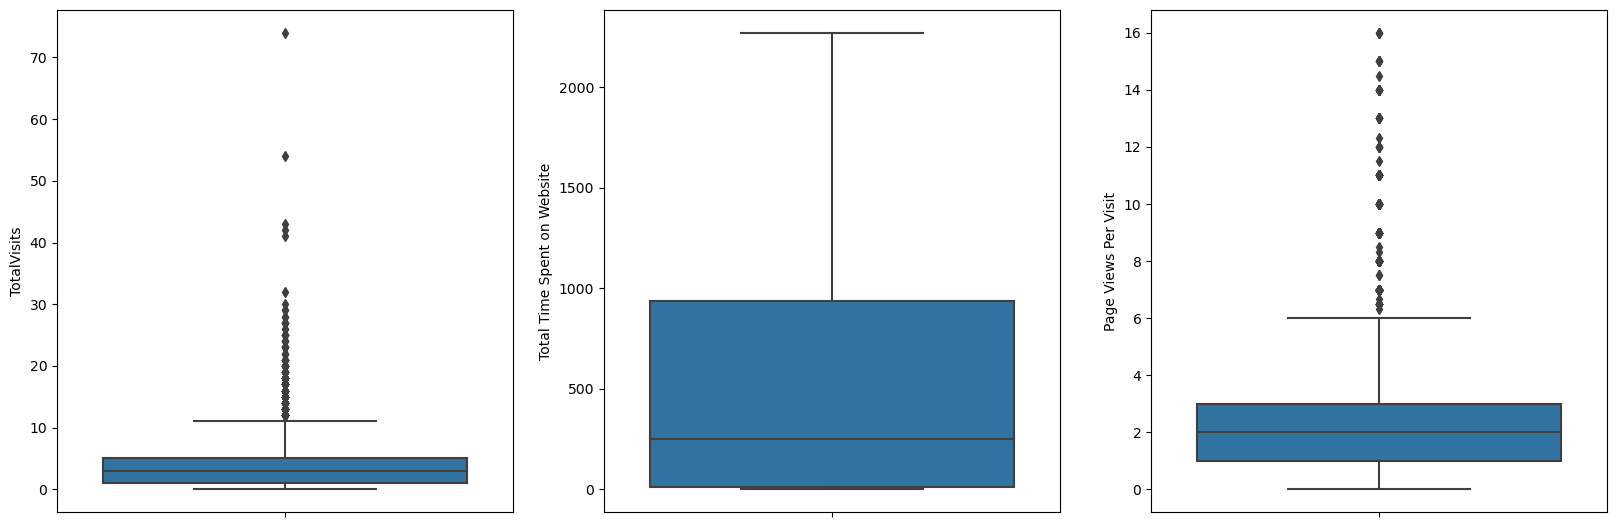

In [52]:
plt.figure(figsize=(20, 30))
plt.subplot(4,3,1)
sns.boxplot(y = 'TotalVisits', data = leadsc)
plt.subplot(4,3,2)
sns.boxplot(y = 'Total Time Spent on Website', data = leadsc)
plt.subplot(4,3,3)
sns.boxplot(y = 'Page Views Per Visit', data = leadsc)
plt.show()

In [53]:
# we can further impute values for Total Visits beyond 50

leadsc = leadsc[(leadsc['TotalVisits']<50)]

In [54]:
leadsc.describe() # we see that initially 9240 observations were there, from there we only imputed 7 observations
#hence the observations should not be affected much

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9233.000000,9233.000000,9233.000000,9233.000000,9233.000000
mean,617190.620925,0.385465,3.363912,487.493556,2.347072
std,23410.904389,0.486731,3.471118,547.970375,2.059060
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596478.000000,0.000000,1.000000,12.000000,1.000000
50%,615488.000000,0.000000,3.000000,248.000000,2.000000
75%,637388.000000,1.000000,5.000000,936.000000,3.000000
max,660737.000000,1.000000,43.000000,2272.000000,16.000000


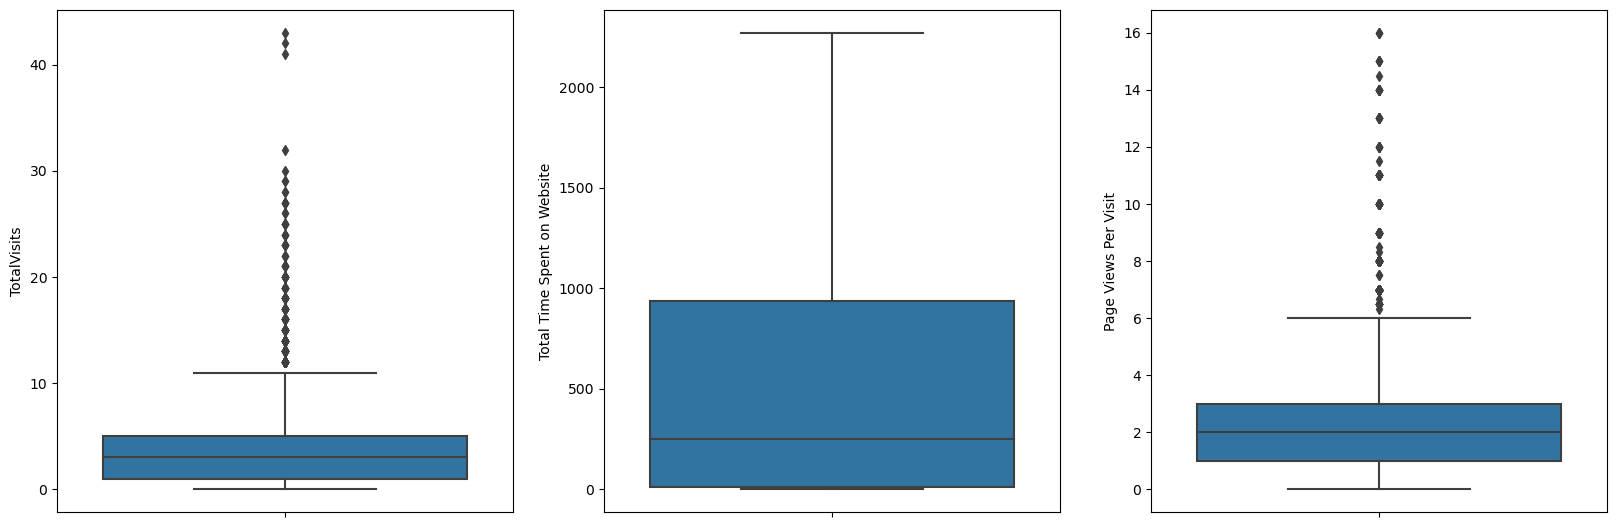

In [55]:
plt.figure(figsize=(20, 30))
plt.subplot(4,3,1)
sns.boxplot(y = 'TotalVisits', data = leadsc)
plt.subplot(4,3,2)
sns.boxplot(y = 'Total Time Spent on Website', data = leadsc)
plt.subplot(4,3,3)
sns.boxplot(y = 'Page Views Per Visit', data = leadsc)
plt.show()

#### The values seem pretty much continuous as we can not completely ignore outliers if they show a continuous pattern. Also all missing values have been treated at this point. Hence we move onto the data analysis part

In [56]:
#To start off data analysis, we need to convert the 'Yes' and 'No' type variables to 1 and 0
#also convert all categorical variables to dummy variables
leadsc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9233 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9233 non-null   object 
 1   Lead Number                             9233 non-null   int64  
 2   Lead Origin                             9233 non-null   object 
 3   Lead Source                             9233 non-null   object 
 4   Do Not Email                            9233 non-null   object 
 5   Converted                               9233 non-null   int64  
 6   TotalVisits                             9233 non-null   float64
 7   Total Time Spent on Website             9233 non-null   int64  
 8   Page Views Per Visit                    9233 non-null   float64
 9   Last Activity                           9233 non-null   object 
 10  What is your current occupation         9233 non-null   obje

In [57]:
#we see that there are 2 columns where Yes No type values are there, hence treating those first
leadsc['Do Not Email'] = leadsc['Do Not Email'].apply(lambda x: 1 if x=='Yes' else 0)

In [58]:
leadsc['Do Not Email'].value_counts()

0    8503
1     730
Name: Do Not Email, dtype: int64

In [59]:
leadsc['A free copy of Mastering The Interview'] = leadsc['A free copy of Mastering The Interview'].apply(lambda x: 1 if x=='Yes' else 0)

In [60]:
leadsc['A free copy of Mastering The Interview'].value_counts()

0    6348
1    2885
Name: A free copy of Mastering The Interview, dtype: int64

### Data Analysis

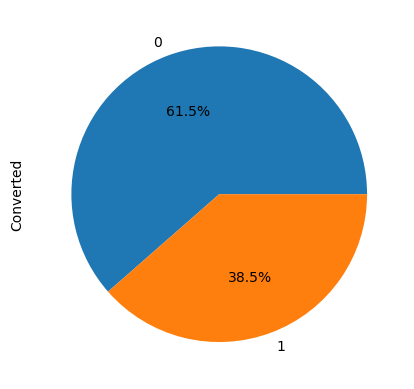

In [61]:
#checking data imbalance
(leadsc.Converted.value_counts(normalize=True)*100).plot.pie(autopct='%1.1f%%')
plt.show()

#we see from below that the data is slightly imbalanced towards Not Converted with 61.5%

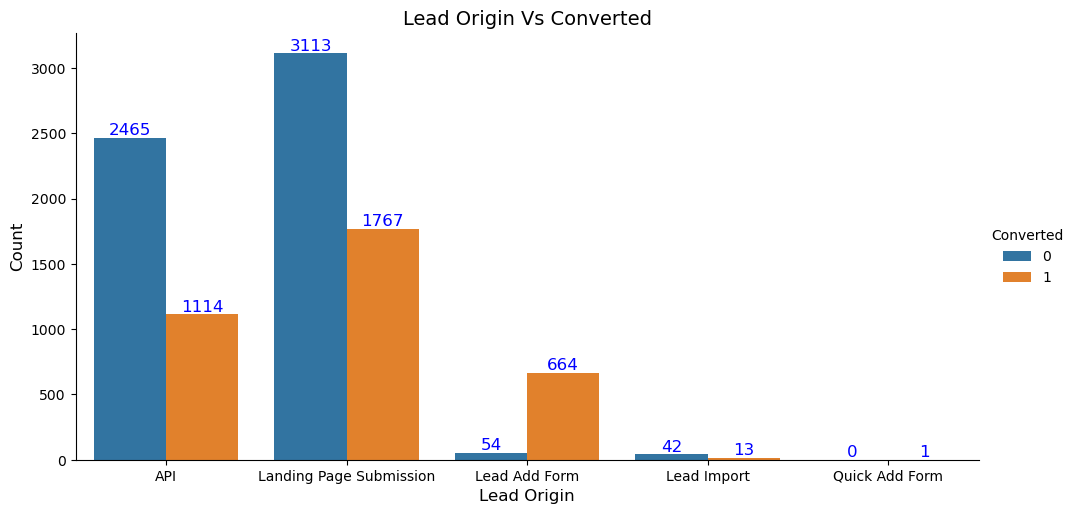

In [62]:
#checking convertions with respect to Lead Origin
plot = sns.catplot(x="Lead Origin", hue = "Converted", kind="count", data=leadsc, aspect=2);

plt.title('Lead Origin Vs Converted', fontsize = 14)
plt.xlabel("Lead Origin", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')
    
plt.show()

##### We see greater conversion rates in Lead Add Form, Lead Import, Quick Add Form but at and the least from API

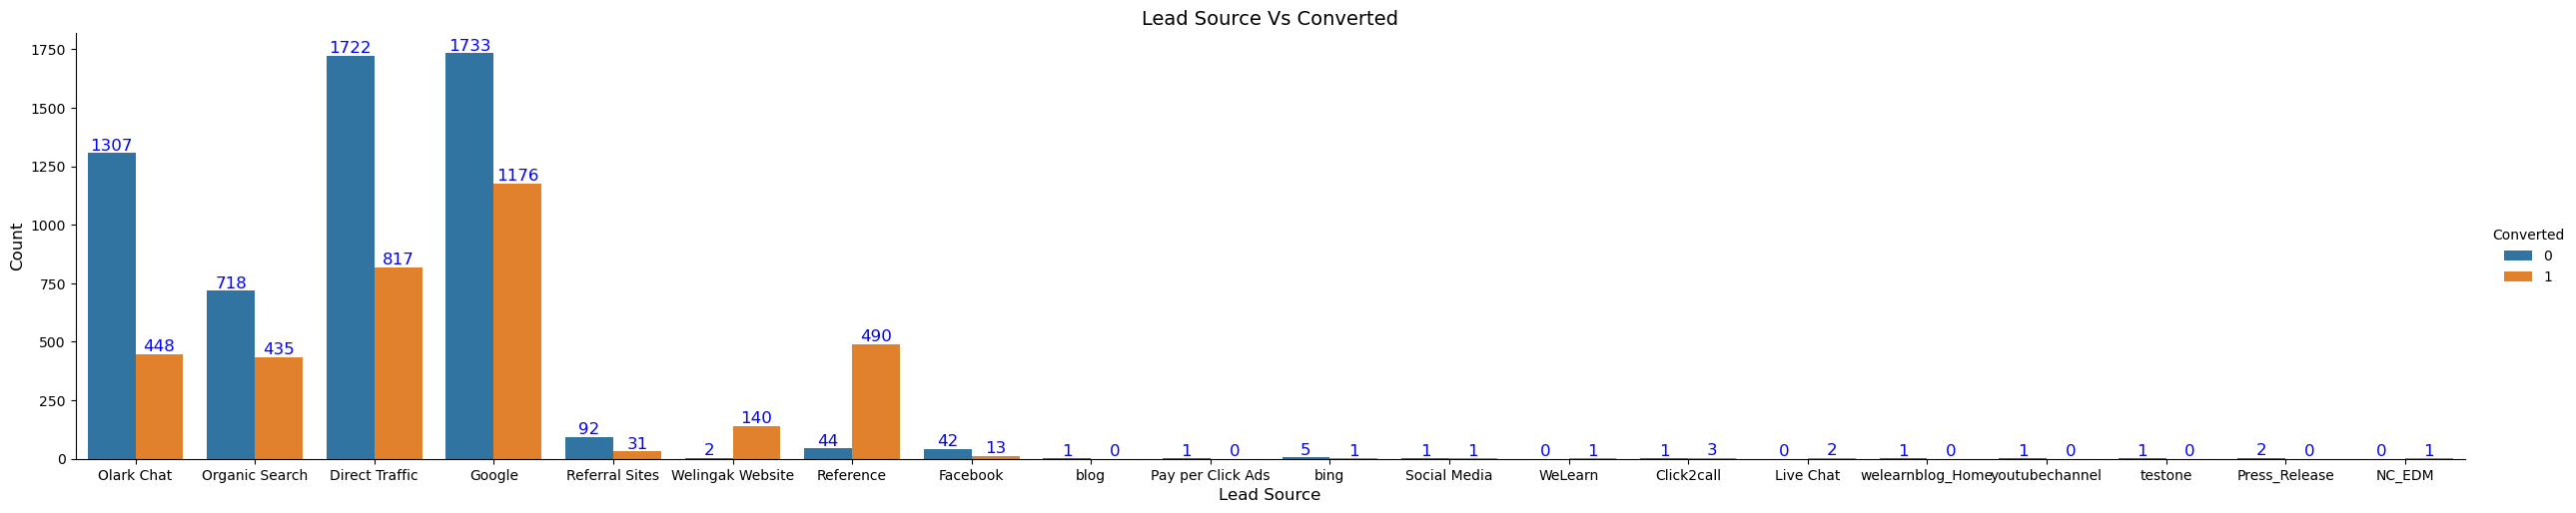

In [63]:
#checking convertions with respect to Lead Source
plot = sns.catplot(x="Lead Source", hue = "Converted", kind="count", data=leadsc, aspect=5);

plt.title('Lead Source Vs Converted', fontsize = 14)
plt.xlabel("Lead Source", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')
plt.show()

##### Here we see good conversion rates from Welingak Website, Reference, Facebook, Google, Organic Search. Rest either have very low counts or less conversion rates

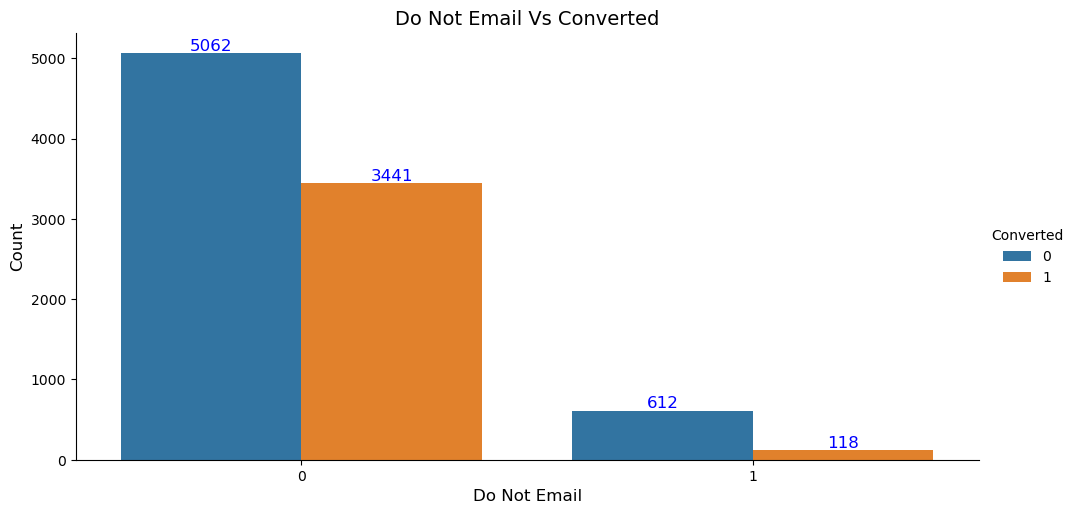

In [64]:
#checking convertions with respect to Do Not Email
plot = sns.catplot(x="Do Not Email", hue = "Converted", kind="count", data=leadsc, aspect=2);

plt.title('Do Not Email Vs Converted', fontsize = 14)
plt.xlabel("Do Not Email", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')
plt.show()

##### People responding no to do not email show higher conversion rates

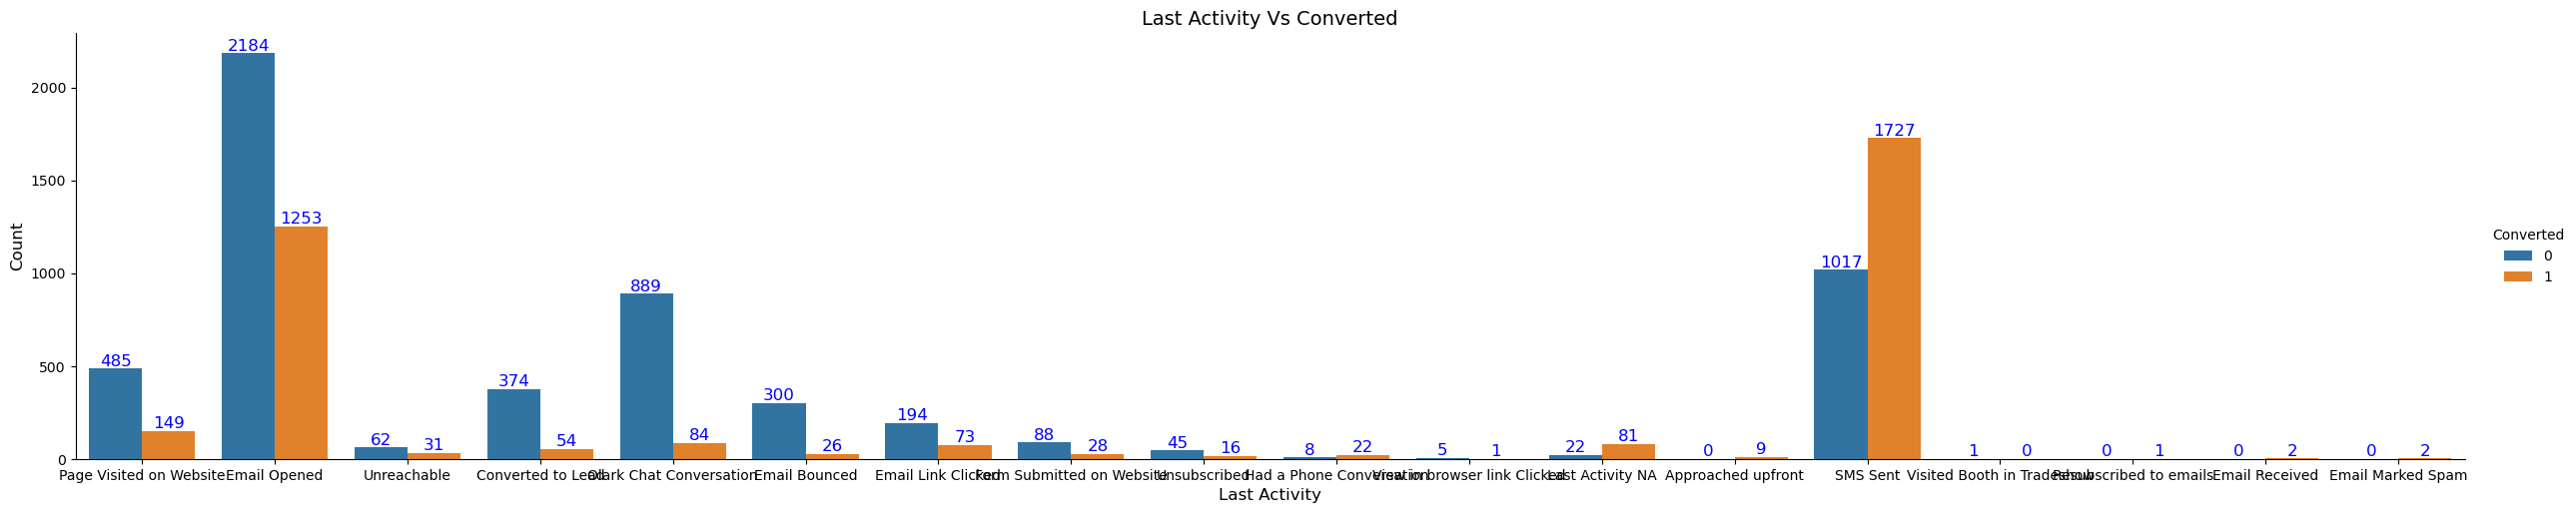

In [65]:
#checking convertions with respect to Last Activity
plot = sns.catplot(x="Last Activity", hue = "Converted", kind="count", data=leadsc, aspect=5);

plt.title('Last Activity Vs Converted', fontsize = 14)
plt.xlabel("Last Activity", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')
plt.show()

##### We see the best conversion rates from Email opened and SMS sent categories

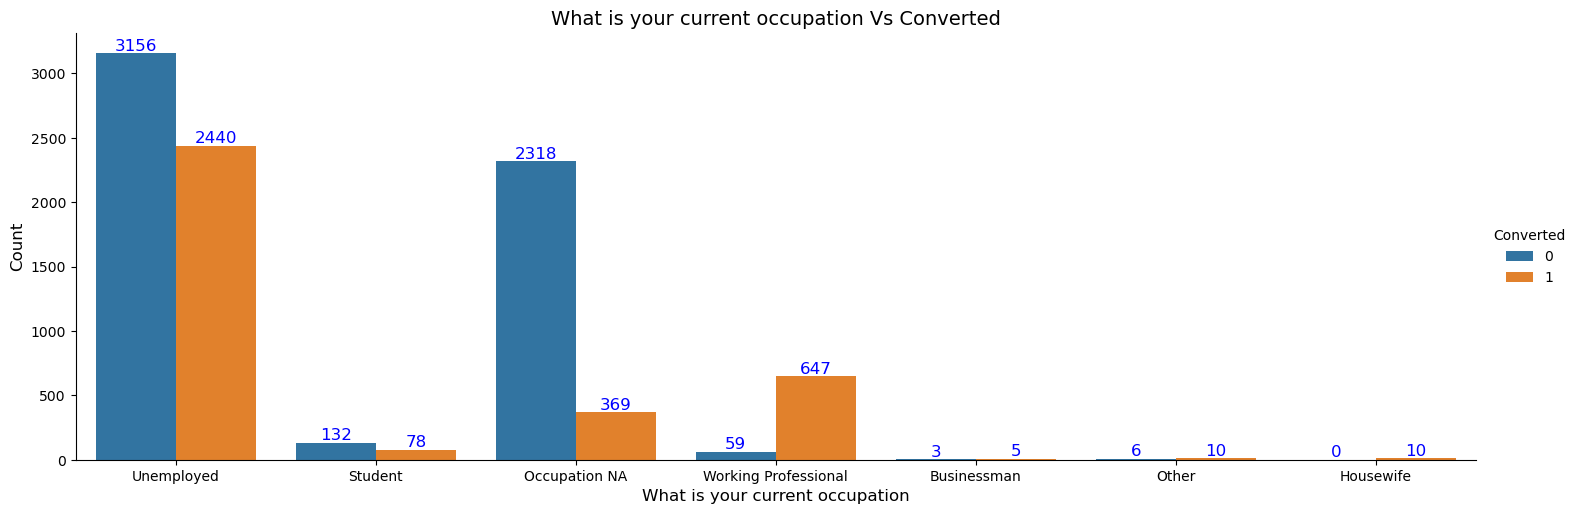

In [66]:
#checking convertions with respect to What is your current occupation
plot = sns.catplot(x="What is your current occupation", hue = "Converted", kind="count", data=leadsc, aspect=3);

plt.title('What is your current occupation Vs Converted', fontsize = 14)
plt.xlabel("What is your current occupation", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')
plt.show()

##### Highest conversion rates can be seen amongst working professionals and unemployed 

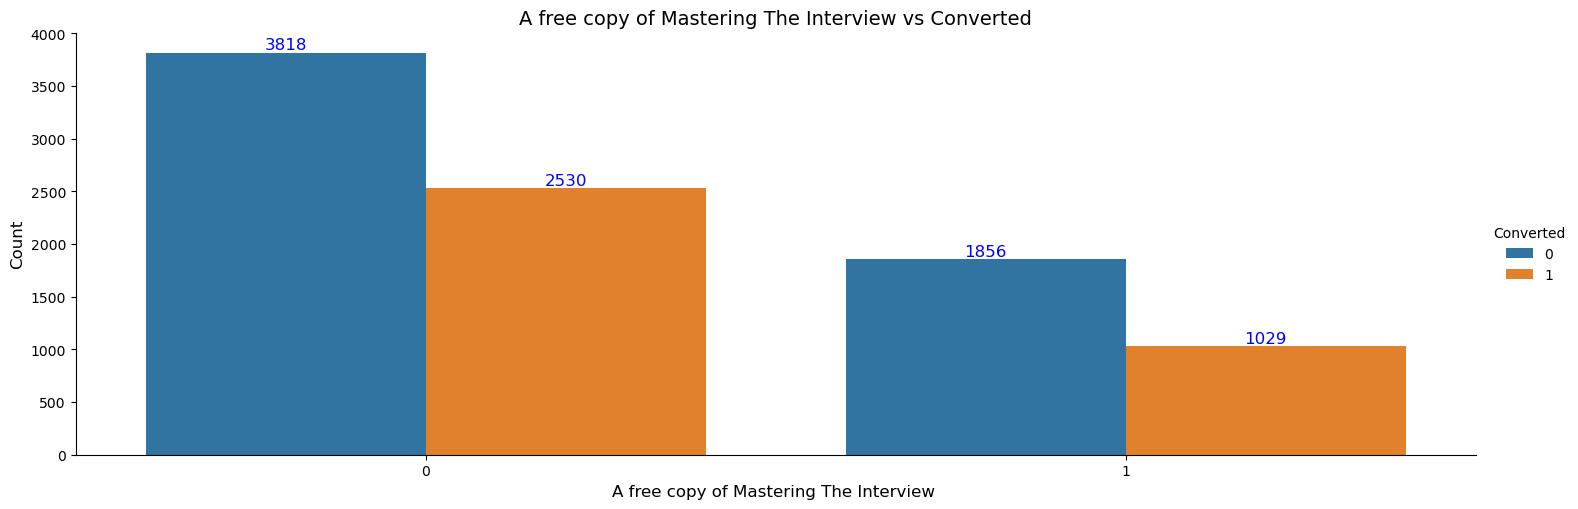

In [67]:
#checking convertions with respect to A free copy of Mastering The Interview 
plot = sns.catplot(x="A free copy of Mastering The Interview", hue = "Converted", kind="count", data=leadsc, aspect=3);

plt.title('A free copy of Mastering The Interview vs Converted', fontsize = 14)
plt.xlabel("A free copy of Mastering The Interview ", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')
plt.show()

##### Similar conversion rates for people responding Yes to free copies of mastering the interview

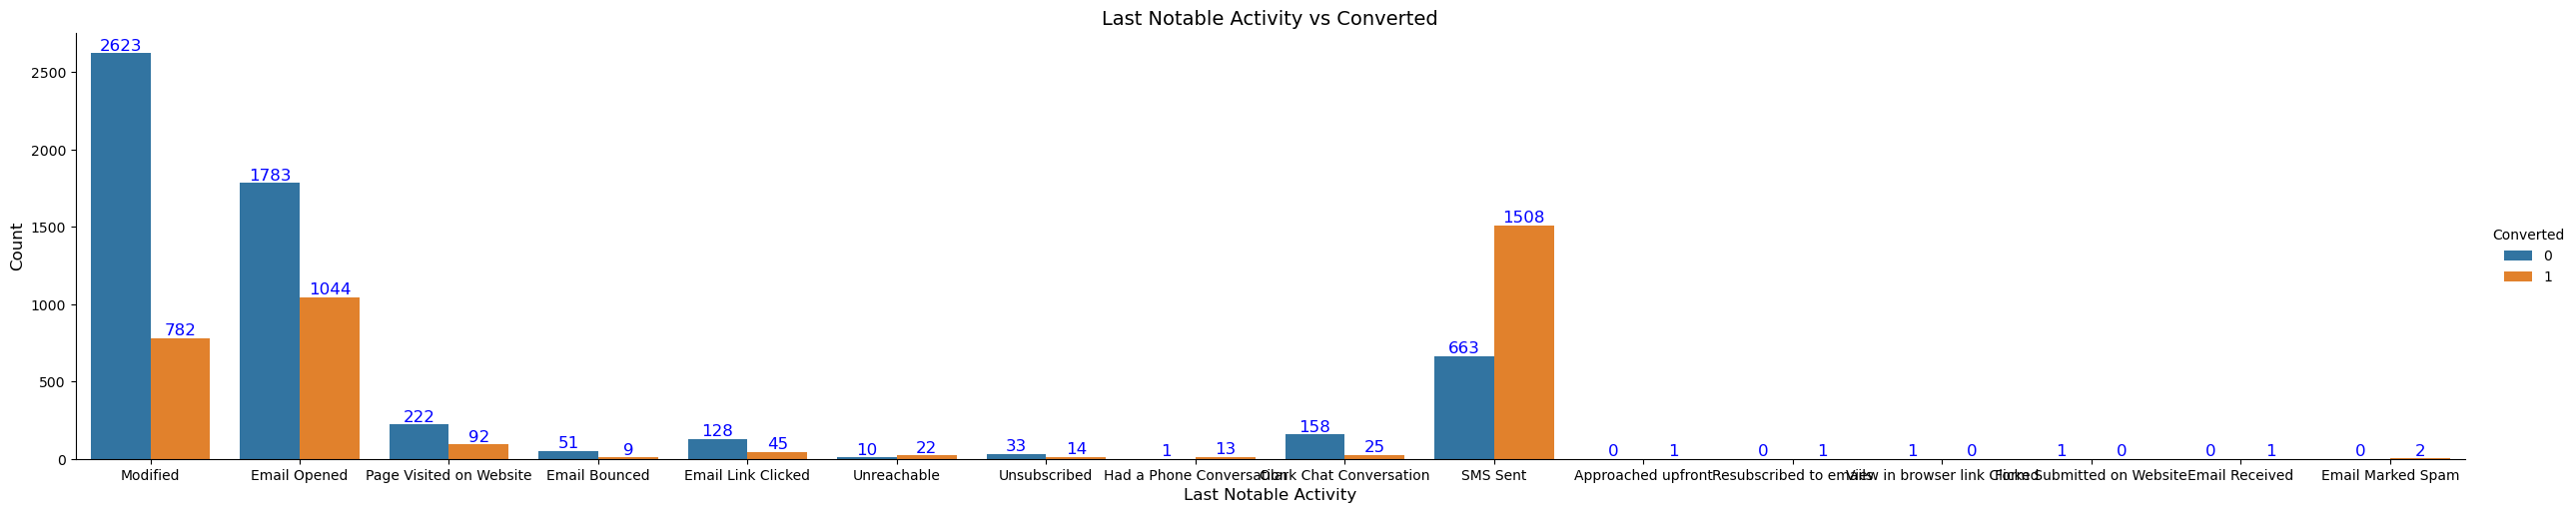

In [68]:
#checking convertions with respect to A free copy of Last Notable Activity
plot = sns.catplot(x="Last Notable Activity", hue = "Converted", kind="count", data=leadsc, aspect=5);

plt.title('Last Notable Activity vs Converted', fontsize = 14)
plt.xlabel("Last Notable Activity", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')
plt.show()

##### Noticeable conversion rates seen on SMS sent, Email Opened and Page visited on website, rest have either low count or low conversion rates

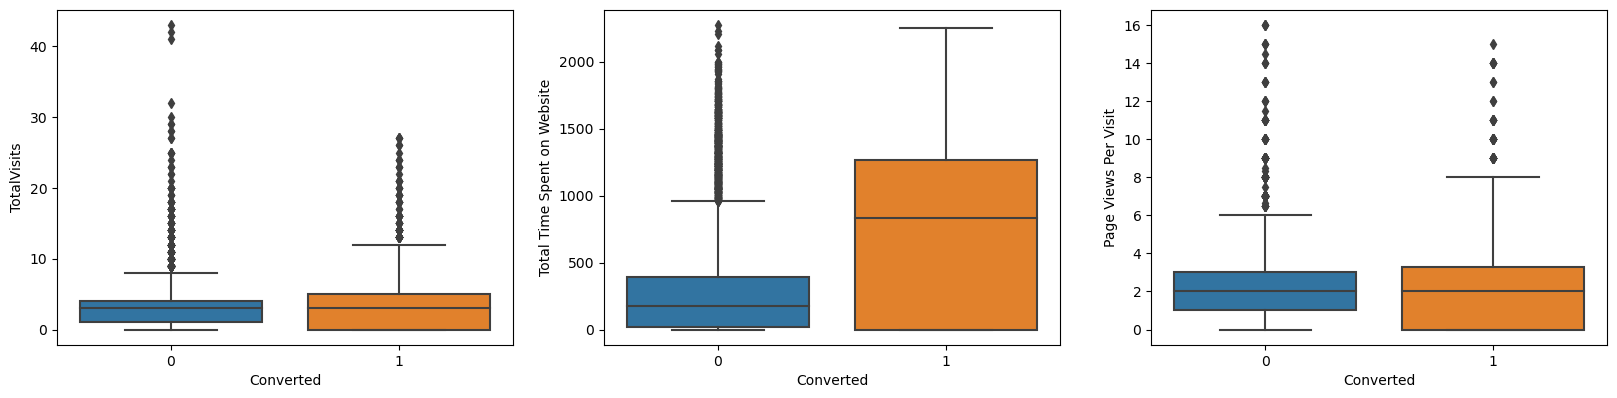

In [69]:
# Now check the conversions for all numeric values

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.boxplot(y = 'TotalVisits', x='Converted', data = leadsc)
plt.subplot(4,3,2)
sns.boxplot(y = 'Total Time Spent on Website', x='Converted', data = leadsc)
plt.subplot(4,3,3)
sns.boxplot(y = 'Page Views Per Visit', x='Converted', data = leadsc)
plt.show()

##### checking numerical values, it was seen that
- Total visits almost had the same interquartile range and same medians for both converted and non-converted
- Time spent on website for converted people had a much larger range and median than those for not converted, indicating people tend to spend more time on website when interested
- Page views per visit shows that the lower boundary of converted dataset had much less value than those of non-converted, a logical conclusion might be people who are already interested might opt for any course at one go or minimum visits rather than making multiple visits to decide

### Now we are finished with the data cleaning and primary exploratory data analysis to get insight about the data, we will move on to the data preparation and modelling phase next

In [70]:
leadsc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9233 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9233 non-null   object 
 1   Lead Number                             9233 non-null   int64  
 2   Lead Origin                             9233 non-null   object 
 3   Lead Source                             9233 non-null   object 
 4   Do Not Email                            9233 non-null   int64  
 5   Converted                               9233 non-null   int64  
 6   TotalVisits                             9233 non-null   float64
 7   Total Time Spent on Website             9233 non-null   int64  
 8   Page Views Per Visit                    9233 non-null   float64
 9   Last Activity                           9233 non-null   object 
 10  What is your current occupation         9233 non-null   obje

In [71]:
# Creating dummies for categorical columns
# will not be relying on the drop_first feature in the create dummies column as it might lead to a highly contributing category getting dropped
# will drop a column with low category count manually

lead_origin = pd.get_dummies(leadsc['Lead Origin'], prefix='LeadOrigin') #converting lead origin

In [72]:
lead_origin.head()

,LeadOrigin_API,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadOrigin_Quick Add Form
0,1,0,0,0,0
1,1,0,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0


In [73]:
lead_origin = lead_origin.drop(['LeadOrigin_Quick Add Form'], axis=1)
leadsc = pd.concat([leadsc, lead_origin], axis = 1)

In [74]:
leadsc.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,LeadOrigin_API,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,Modified,1,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Unemployed,0,Email Opened,1,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Student,1,Email Opened,0,1,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Unemployed,0,Modified,0,1,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,Modified,0,1,0,0


In [75]:
#similarly converting the rest of the categorical features

lead_so = pd.get_dummies(leadsc['Lead Source'], prefix='Lead_Source') #converting lead source
lead_so = lead_so.drop(['Lead_Source_NC_EDM'], axis=1)
leadsc = pd.concat([leadsc, lead_so], axis = 1)
leadsc.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Social Media,Lead_Source_WeLearn,Lead_Source_Welingak Website,Lead_Source_bing,Lead_Source_blog,Lead_Source_testone,Lead_Source_welearnblog_Home,Lead_Source_youtubechannel
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,0,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,...,0,0,0,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,0,0,0,0,0,0,0,0


In [76]:
last_act = pd.get_dummies(leadsc['Last Activity'], prefix='Last_Activity') #converting last activity
last_act = last_act.drop(['Last_Activity_Email Marked Spam'],axis=1)
leadsc = pd.concat([leadsc, last_act], axis = 1)
leadsc.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last_Activity_Had a Phone Conversation,Last_Activity_Last Activity NA,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_Resubscribed to emails,Last_Activity_SMS Sent,Last_Activity_Unreachable,Last_Activity_Unsubscribed,Last_Activity_View in browser link Clicked,Last_Activity_Visited Booth in Tradeshow
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,0,1,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,...,0,0,0,0,0,0,1,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,0,0,0,0,0,0,0,0


In [77]:
curr_occ = pd.get_dummies(leadsc['What is your current occupation'], prefix='Curr_occ') #converting current occupation
curr_occ = curr_occ.drop(['Curr_occ_Housewife'],axis=1)
leadsc = pd.concat([leadsc, curr_occ], axis = 1)
leadsc.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last_Activity_Unreachable,Last_Activity_Unsubscribed,Last_Activity_View in browser link Clicked,Last_Activity_Visited Booth in Tradeshow,Curr_occ_Businessman,Curr_occ_Occupation NA,Curr_occ_Other,Curr_occ_Student,Curr_occ_Unemployed,Curr_occ_Working Professional
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,0,0,0,0,0,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,1,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,1,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,...,1,0,0,0,0,0,0,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,0,0,0,0,0,0,1,0


In [78]:
leadsc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9233 entries, 0 to 9239
Data columns (total 59 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Prospect ID                                 9233 non-null   object 
 1   Lead Number                                 9233 non-null   int64  
 2   Lead Origin                                 9233 non-null   object 
 3   Lead Source                                 9233 non-null   object 
 4   Do Not Email                                9233 non-null   int64  
 5   Converted                                   9233 non-null   int64  
 6   TotalVisits                                 9233 non-null   float64
 7   Total Time Spent on Website                 9233 non-null   int64  
 8   Page Views Per Visit                        9233 non-null   float64
 9   Last Activity                               9233 non-null   object 
 10  What is your

In [79]:
LNA = pd.get_dummies(leadsc['Last Notable Activity'], prefix='Last_N_Activity') #converting last notable activity
LNA = LNA.drop(['Last_N_Activity_Email Marked Spam'],axis=1)
leadsc = pd.concat([leadsc, LNA], axis = 1)
leadsc.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last_N_Activity_Form Submitted on Website,Last_N_Activity_Had a Phone Conversation,Last_N_Activity_Modified,Last_N_Activity_Olark Chat Conversation,Last_N_Activity_Page Visited on Website,Last_N_Activity_Resubscribed to emails,Last_N_Activity_SMS Sent,Last_N_Activity_Unreachable,Last_N_Activity_Unsubscribed,Last_N_Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


In [80]:
leadsc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9233 entries, 0 to 9239
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Prospect ID                                   9233 non-null   object 
 1   Lead Number                                   9233 non-null   int64  
 2   Lead Origin                                   9233 non-null   object 
 3   Lead Source                                   9233 non-null   object 
 4   Do Not Email                                  9233 non-null   int64  
 5   Converted                                     9233 non-null   int64  
 6   TotalVisits                                   9233 non-null   float64
 7   Total Time Spent on Website                   9233 non-null   int64  
 8   Page Views Per Visit                          9233 non-null   float64
 9   Last Activity                                 9233 non-null   o

In [81]:
#removing the redundant or non required variables

leadsc = leadsc.drop(['Prospect ID','Lead Number','Lead Origin','Lead Source','Last Activity','What is your current occupation','Last Notable Activity'],axis=1)
leadsc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9233 entries, 0 to 9239
Data columns (total 67 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Do Not Email                                  9233 non-null   int64  
 1   Converted                                     9233 non-null   int64  
 2   TotalVisits                                   9233 non-null   float64
 3   Total Time Spent on Website                   9233 non-null   int64  
 4   Page Views Per Visit                          9233 non-null   float64
 5   A free copy of Mastering The Interview        9233 non-null   int64  
 6   LeadOrigin_API                                9233 non-null   uint8  
 7   LeadOrigin_Landing Page Submission            9233 non-null   uint8  
 8   LeadOrigin_Lead Add Form                      9233 non-null   uint8  
 9   LeadOrigin_Lead Import                        9233 non-null   u

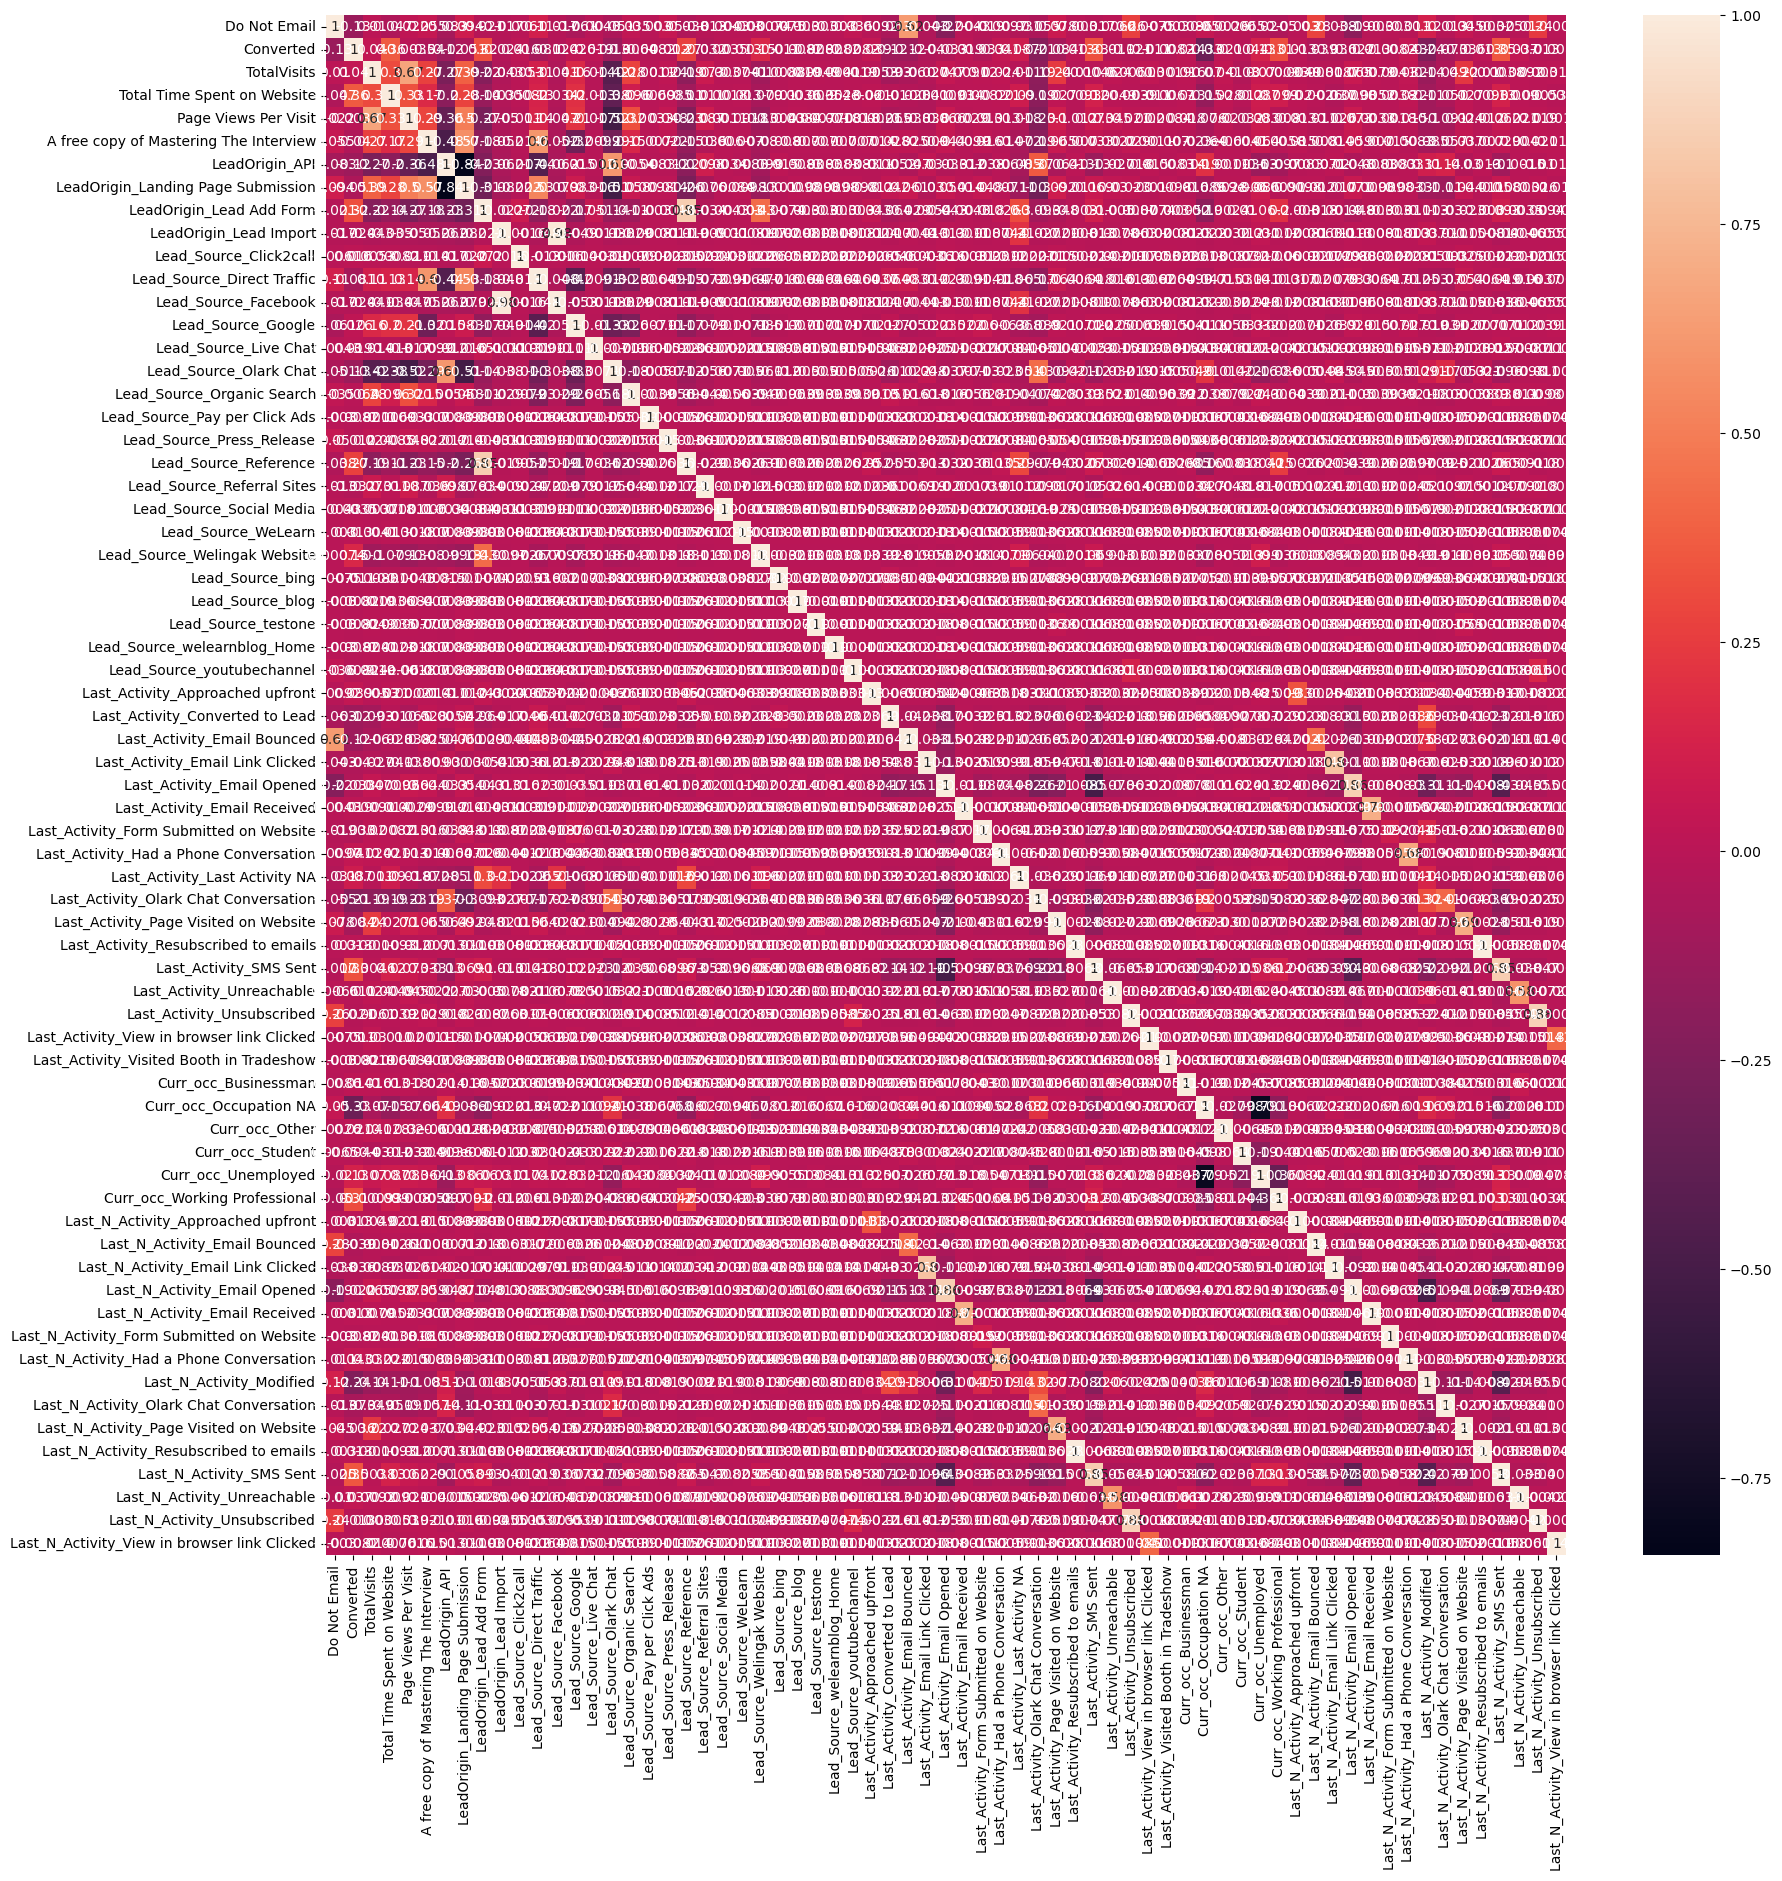

In [82]:
plt.figure(figsize=(20,20))
sns.heatmap(leadsc.corr(), annot=True)
plt.show()

#### We cannot derive conclusive pointers from the above heatmap due to such high number of columns, hence moving onto modelling part

### Modelling

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
# Putting feature variable to X
X = leadsc.drop(['Converted'], axis=1)

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LeadOrigin_API,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,Lead_Source_Click2call,...,Last_N_Activity_Form Submitted on Website,Last_N_Activity_Had a Phone Conversation,Last_N_Activity_Modified,Last_N_Activity_Olark Chat Conversation,Last_N_Activity_Page Visited on Website,Last_N_Activity_Resubscribed to emails,Last_N_Activity_SMS Sent,Last_N_Activity_Unreachable,Last_N_Activity_Unsubscribed,Last_N_Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [85]:
y = leadsc.Converted #putting output variable to y
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [86]:
X.shape #checking the shapes after allocation of x and y variables

(9233, 66)

In [87]:
y.shape

(9233,)

In [88]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [89]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LeadOrigin_API,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,Lead_Source_Click2call,...,Last_N_Activity_Form Submitted on Website,Last_N_Activity_Had a Phone Conversation,Last_N_Activity_Modified,Last_N_Activity_Olark Chat Conversation,Last_N_Activity_Page Visited on Website,Last_N_Activity_Resubscribed to emails,Last_N_Activity_SMS Sent,Last_N_Activity_Unreachable,Last_N_Activity_Unsubscribed,Last_N_Activity_View in browser link Clicked
1032,0,0.139535,0.606074,0.37500,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6535,0,0.116279,0.196303,0.15625,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6238,0,0.000000,0.000000,0.00000,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3190,0,0.093023,0.704225,0.25000,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
712,0,0.023256,0.066461,0.06250,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


##### Building a simple model for start using statsmodels

In [90]:
import statsmodels.api as sm

# Model #1

In [91]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6463
Model:                            GLM   Df Residuals:                     6404
Model Family:                Binomial   Df Model:                           58
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 18 Jul 2023   Deviance:                   1.7960e+05
Time:                        18:28:23   Pearson chi2:                 8.78e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                         7.392e+15   6.98e+07   1.06e+08      0.000    7.39e+15    7.39e+15
Do Not Email                                 -5.642e+14   4.38e+06  -1.29e+08      0.000   -5.64e+14   -5.64e+14
TotalVisits                                   1.125e+14    1.5e+07   7.51e+06      0.000    1.12e+14    1.12e+14
Total Time Spent on Website                  -2.763e+14   4.01e+06  -6.89e+07      0.000   -2.76e+14   -2.76e+14
Page Views Per Visit                          3.091e+14   1.03e+07      3e+07      0.000    3.09e+14    3.09e+14
A free copy of Mastering The Interview        1.634e+14   2.64e+06    6.2e+07      0.000    1.63e+14    1.63e+14
LeadOrigin_API                                1.814e+15      2e+07   9.05e+07      0.000    1.81e+15    1.81e+15
LeadOrigin_Landing Page Submission            1.404e+15      2e+07   7.02e+07      0.000     1.4e+15     1.4e+15
LeadOrigin_Lead Add Form                      3.421e+15   2.27e+07   1.51e+08      0.000    3.42e+15    3.42e+15
LeadOrigin_Lead Import                        7.538e+14   4.22e+07   1.79e+07      0.000    7.54e+14    7.54e+14
Lead_Source_Click2call                       -4.621e+15   8.35e+07  -5.54e+07      0.000   -4.62e+15   -4.62e+15
Lead_Source_Direct Traffic                   -3.094e+15   6.72e+07   -4.6e+07      0.000   -3.09e+15   -3.09e+15
Lead_Source_Facebook                         -3.964e+15   8.25e+07   -4.8e+07      0.000   -3.96e+15   -3.96e+15
Lead_Source_Google                           -2.954e+15   6.72e+07   -4.4e+07      0.000   -2.95e+15   -2.95e+15
Lead_Source_Live Chat                        -2.101e+15   8.34e+07  -2.52e+07      0.000    -2.1e+15    -2.1e+15
Lead_Source_Olark Chat                       -2.338e+15   6.73e+07  -3.48e+07      0.000   -2.34e+15   -2.34e+15
Lead_Source_Organic Search                   -3.191e+15   6.72e+07  -4.74e+07      0.000   -3.19e+15   -3.19e+15
Lead_Source_Pay per Click Ads                -5.882e+15    9.5e+07  -6.19e+07      0.000   -5.88e+15   -5.88e+15
Lead_Source_Press_Release                       60.4840   5.84e-07   1.04e+08      0.000      60.484      60.484
Lead_Source_Reference                        -4.712e+15   6.87e+07  -6.86e+07      0.000   -4.71e+15   -4.71e+15
Lead_Source_Referral Sites                   -3.318e+15   6.76e+07  -4.91e+07      0.000   -3.32e+15   -3.32e+15
Lead_Source_Social Media                     -2.862e+15   8.23e+07  -3.48e+07      0.000   -2.86e+15   -2.86e+15
Lead_Source_WeLearn                            2.03e+15   9.49e+07   2.14e+07      0.000    2.03e+15    2.03e+15
Lead_Source_Welingak Website                 -3.832e+15   6.89e+07  -5.56e+07      0.000   -3.83e+15   -3.83e+15
Lead_Source_bing                

#### Using RFE for feature selection, limiting to 20 features first

In [92]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE

In [93]:
rfe = RFE(estimator=logreg, n_features_to_select=20) #specifying number of variables 
rfe = rfe.fit(X_train, y_train)

In [94]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 31),
 ('LeadOrigin_API', True, 1),
 ('LeadOrigin_Landing Page Submission', True, 1),
 ('LeadOrigin_Lead Add Form', True, 1),
 ('LeadOrigin_Lead Import', False, 14),
 ('Lead_Source_Click2call', False, 6),
 ('Lead_Source_Direct Traffic', False, 15),
 ('Lead_Source_Facebook', True, 1),
 ('Lead_Source_Google', False, 18),
 ('Lead_Source_Live Chat', False, 28),
 ('Lead_Source_Olark Chat', True, 1),
 ('Lead_Source_Organic Search', False, 17),
 ('Lead_Source_Pay per Click Ads', False, 25),
 ('Lead_Source_Press_Release', False, 47),
 ('Lead_Source_Reference', False, 21),
 ('Lead_Source_Referral Sites', False, 16),
 ('Lead_Source_Social Media', False, 3),
 ('Lead_Source_WeLearn', False, 22),
 ('Lead_Source_Welingak Website', True, 1),
 ('Lead_Source_bing', False, 27),
 ('Lead_Source_blog', False, 26),
 ('Lead_Sou

In [95]:
top20 = X_train.columns[rfe.support_]
top20 #top 20 variables selected by RFE

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'LeadOrigin_API',
       'LeadOrigin_Landing Page Submission', 'LeadOrigin_Lead Add Form',
       'Lead_Source_Facebook', 'Lead_Source_Olark Chat',
       'Lead_Source_Welingak Website', 'Last_Activity_Approached upfront',
       'Last_Activity_Converted to Lead', 'Last_Activity_Email Bounced',
       'Last_Activity_Olark Chat Conversation', 'Last_Activity_SMS Sent',
       'Curr_occ_Occupation NA', 'Curr_occ_Working Professional',
       'Last_N_Activity_Had a Phone Conversation', 'Last_N_Activity_Modified',
       'Last_N_Activity_Unreachable'],
      dtype='object')

# Model #2

In [96]:
X_train_sm = sm.add_constant(X_train[top20])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6463
Model:                            GLM   Df Residuals:                     6442
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2594.8
Date:                Tue, 18 Jul 2023   Deviance:                       5189.6
Time:                        18:28:27   Pearson chi2:                 6.68e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4117
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.0573      1.637     -0.646      0.518      -4.266       2.152
Do Not Email                                -1.2753      0.194     -6.569      0.000      -1.656      -0.895
TotalVisits                                  2.4433      0.532      4.592      0.000       1.400       3.486
Total Time Spent on Website                  4.5417      0.167     27.136      0.000       4.214       4.870
Page Views Per Visit                        -1.4509      0.395     -3.676      0.000      -2.225      -0.677
LeadOrigin_API                              -0.5276      1.640     -0.322      0.748      -3.742       2.687
LeadOrigin_Landing Page Submission          -0.8899      1.639     -0.543      0.587      -4.102       2.323
LeadOrigin_Lead Add Form                     2.5555      1.647      1.552      0.121      -0.672       5.783
Lead_Source_Facebook                        -0.9322      1.637     -0.569      0.569      -4.141       2.277
Lead_Source_Olark Chat                       0.9250      0.135      6.867      0.000       0.661       1.189
Lead_Source_Welingak Website                 2.6569      1.027      2.588      0.010       0.644       4.669
Last_Activity_Approached upfront            21.0718   1.17e+04      0.002      0.999   -2.29e+04    2.29e+04
Last_Activity_Converted to Lead             -0.6613      0.224     -2.948      0.003      -1.101      -0.222
Last_Activity_Email Bounced                 -0.6797      0.368     -1.847      0.065      -1.401       0.041
Last_Activity_Olark Chat Conversation       -1.0292      0.172     -5.996      0.000      -1.366      -0.693
Last_Activity_SMS Sent                       1.1819      0.077     15.381      0.000       1.031       1.333
Curr_occ_Occupation NA                      -1.1928      0.089    -13.475      0.000      -1.366      -1.019
Curr_occ_Working Professional                2.4742      0.183     13.520      0.000       2.116       2.833
Last_N_Activity_Had a Phone Conversation     3.2237      1.155      2.791      0.005       0.960       5.487
Last_N_Activity_Modified                    -0.6341      0.086     -7.381      0.000      -0.802      -0.466
Last_N_Activity_Unreachable                  1.9358      0.576      3.362      0.001       0.807       3.064
============================================================================================================
"""

In [97]:
# Last_Activity_Approached upfront has a very high p-value, hence removing it
cols = top20.drop('Last_Activity_Approached upfront',1)

# Model #3

In [98]:
#rebuilding model
X_train_sm = sm.add_constant(X_train[cols])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6463
Model:                            GLM   Df Residuals:                     6443
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2596.5
Date:                Tue, 18 Jul 2023   Deviance:                       5193.0
Time:                        18:28:27   Pearson chi2:                 6.68e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4114
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.0593      1.638     -0.647      0.518      -4.270       2.151
Do Not Email                                -1.2759      0.194     -6.572      0.000      -1.656      -0.895
TotalVisits                                  2.4422      0.532      4.590      0.000       1.399       3.485
Total Time Spent on Website                  4.5423      0.167     27.146      0.000       4.214       4.870
Page Views Per Visit                        -1.4499      0.395     -3.674      0.000      -2.223      -0.676
LeadOrigin_API                              -0.5258      1.641     -0.320      0.749      -3.742       2.690
LeadOrigin_Landing Page Submission          -0.8881      1.640     -0.542      0.588      -4.102       2.326
LeadOrigin_Lead Add Form                     2.5610      1.648      1.554      0.120      -0.668       5.790
Lead_Source_Facebook                        -0.9325      1.638     -0.569      0.569      -4.143       2.278
Lead_Source_Olark Chat                       0.9312      0.135      6.917      0.000       0.667       1.195
Lead_Source_Welingak Website                 2.6531      1.027      2.584      0.010       0.641       4.666
Last_Activity_Converted to Lead             -0.6664      0.224     -2.971      0.003      -1.106      -0.227
Last_Activity_Email Bounced                 -0.6836      0.368     -1.858      0.063      -1.405       0.038
Last_Activity_Olark Chat Conversation       -1.0361      0.172     -6.039      0.000      -1.372      -0.700
Last_Activity_SMS Sent                       1.1802      0.077     15.361      0.000       1.030       1.331
Curr_occ_Occupation NA                      -1.1949      0.088    -13.502      0.000      -1.368      -1.021
Curr_occ_Working Professional                2.4727      0.183     13.513      0.000       2.114       2.831
Last_N_Activity_Had a Phone Conversation     3.2243      1.155      2.791      0.005       0.960       5.488
Last_N_Activity_Modified                    -0.6287      0.086     -7.326      0.000      -0.797      -0.460
Last_N_Activity_Unreachable                  1.9350      0.576      3.360      0.001       0.806       3.064
============================================================================================================
"""

In [99]:
#LeadOrigin_API has high p-value, hence removing it

cols = cols.drop('LeadOrigin_API',1)

# Model #4

In [100]:
X_train_sm = sm.add_constant(X_train[cols])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6463
Model:                            GLM   Df Residuals:                     6444
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2596.5
Date:                Tue, 18 Jul 2023   Deviance:                       5193.1
Time:                        18:28:27   Pearson chi2:                 6.68e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4114
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.5829      0.119    -13.317      0.000      -1.816      -1.350
Do Not Email                                -1.2757      0.194     -6.572      0.000      -1.656      -0.895
TotalVisits                                  2.4408      0.532      4.587      0.000       1.398       3.484
Total Time Spent on Website                  4.5416      0.167     27.145      0.000       4.214       4.870
Page Views Per Visit                        -1.4530      0.395     -3.683      0.000      -2.226      -0.680
LeadOrigin_Landing Page Submission          -0.3635      0.092     -3.965      0.000      -0.543      -0.184
LeadOrigin_Lead Add Form                     3.0848      0.207     14.883      0.000       2.679       3.491
Lead_Source_Facebook                        -0.4369      0.513     -0.852      0.394      -1.442       0.568
Lead_Source_Olark Chat                       0.9293      0.134      6.910      0.000       0.666       1.193
Lead_Source_Welingak Website                 2.6532      1.027      2.584      0.010       0.641       4.666
Last_Activity_Converted to Lead             -0.6674      0.224     -2.976      0.003      -1.107      -0.228
Last_Activity_Email Bounced                 -0.6843      0.368     -1.860      0.063      -1.405       0.037
Last_Activity_Olark Chat Conversation       -1.0368      0.172     -6.043      0.000      -1.373      -0.701
Last_Activity_SMS Sent                       1.1796      0.077     15.358      0.000       1.029       1.330
Curr_occ_Occupation NA                      -1.1950      0.088    -13.504      0.000      -1.368      -1.022
Curr_occ_Working Professional                2.4728      0.183     13.514      0.000       2.114       2.831
Last_N_Activity_Had a Phone Conversation     3.2240      1.155      2.791      0.005       0.960       5.488
Last_N_Activity_Modified                    -0.6284      0.086     -7.323      0.000      -0.797      -0.460
Last_N_Activity_Unreachable                  1.9347      0.576      3.360      0.001       0.806       3.063
============================================================================================================
"""

In [101]:
#Lead_Source_Facebook has high p-value, hence dropping it
cols = cols.drop('Lead_Source_Facebook',1)


# Model #5

In [102]:
X_train_sm = sm.add_constant(X_train[cols])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6463
Model:                            GLM   Df Residuals:                     6445
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2596.9
Date:                Tue, 18 Jul 2023   Deviance:                       5193.8
Time:                        18:28:27   Pearson chi2:                 6.68e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4113
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.5992      0.117    -13.628      0.000      -1.829      -1.369
Do Not Email                                -1.2744      0.194     -6.564      0.000      -1.655      -0.894
TotalVisits                                  2.4552      0.532      4.616      0.000       1.413       3.498
Total Time Spent on Website                  4.5482      0.167     27.205      0.000       4.220       4.876
Page Views Per Visit                        -1.4352      0.394     -3.643      0.000      -2.207      -0.663
LeadOrigin_Landing Page Submission          -0.3546      0.091     -3.891      0.000      -0.533      -0.176
LeadOrigin_Lead Add Form                     3.1017      0.206     15.029      0.000       2.697       3.506
Lead_Source_Olark Chat                       0.9448      0.133      7.086      0.000       0.683       1.206
Lead_Source_Welingak Website                 2.6525      1.027      2.583      0.010       0.640       4.665
Last_Activity_Converted to Lead             -0.6579      0.224     -2.936      0.003      -1.097      -0.219
Last_Activity_Email Bounced                 -0.6811      0.368     -1.850      0.064      -1.403       0.040
Last_Activity_Olark Chat Conversation       -1.0313      0.172     -6.014      0.000      -1.367      -0.695
Last_Activity_SMS Sent                       1.1801      0.077     15.369      0.000       1.030       1.331
Curr_occ_Occupation NA                      -1.1939      0.088    -13.491      0.000      -1.367      -1.020
Curr_occ_Working Professional                2.4721      0.183     13.513      0.000       2.114       2.831
Last_N_Activity_Had a Phone Conversation     3.2264      1.155      2.793      0.005       0.963       5.490
Last_N_Activity_Modified                    -0.6327      0.086     -7.385      0.000      -0.801      -0.465
Last_N_Activity_Unreachable                  1.9367      0.576      3.364      0.001       0.808       3.065
============================================================================================================
"""

In [103]:
#Last_Activity_Email Bounced seems to have a bit high p-value, hence removing it
cols = cols.drop('Last_Activity_Email Bounced',1)


# Model #6

In [104]:
X_train_sm = sm.add_constant(X_train[cols])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6463
Model:                            GLM   Df Residuals:                     6446
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2598.7
Date:                Tue, 18 Jul 2023   Deviance:                       5197.5
Time:                        18:28:27   Pearson chi2:                 6.68e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4110
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.6083      0.117    -13.708      0.000      -1.838      -1.378
Do Not Email                                -1.4622      0.170     -8.588      0.000      -1.796      -1.128
TotalVisits                                  2.4906      0.532      4.678      0.000       1.447       3.534
Total Time Spent on Website                  4.5407      0.167     27.176      0.000       4.213       4.868
Page Views Per Visit                        -1.4207      0.394     -3.603      0.000      -2.194      -0.648
LeadOrigin_Landing Page Submission          -0.3548      0.091     -3.896      0.000      -0.533      -0.176
LeadOrigin_Lead Add Form                     3.1102      0.206     15.079      0.000       2.706       3.514
Lead_Source_Olark Chat                       0.9446      0.133      7.084      0.000       0.683       1.206
Lead_Source_Welingak Website                 2.6321      1.024      2.570      0.010       0.625       4.640
Last_Activity_Converted to Lead             -0.6339      0.224     -2.834      0.005      -1.072      -0.195
Last_Activity_Olark Chat Conversation       -1.0119      0.171     -5.909      0.000      -1.347      -0.676
Last_Activity_SMS Sent                       1.1995      0.076     15.739      0.000       1.050       1.349
Curr_occ_Occupation NA                      -1.1921      0.089    -13.469      0.000      -1.366      -1.019
Curr_occ_Working Professional                2.4654      0.182     13.523      0.000       2.108       2.823
Last_N_Activity_Had a Phone Conversation     3.2288      1.155      2.795      0.005       0.965       5.493
Last_N_Activity_Modified                    -0.6478      0.085     -7.597      0.000      -0.815      -0.481
Last_N_Activity_Unreachable                  1.9445      0.577      3.371      0.001       0.814       3.075
============================================================================================================
"""

In [105]:
# here the p-values seem to be in acceptable range, hence checking the VIFs of the variables

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,4.80
1,TotalVisits,3.51
4,LeadOrigin_Landing Page Submission,2.94
2,Total Time Spent on Website,2.03
14,Last_N_Activity_Modified,2.00
9,Last_Activity_Olark Chat Conversation,1.60
6,Lead_Source_Olark Chat,1.59
10,Last_Activity_SMS Sent,1.53
11,Curr_occ_Occupation NA,1.51
5,LeadOrigin_Lead Add Form,1.47


### the VIFs seem to be within acceptable range, hence we can continue making predictions using this model

In [106]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [107]:
y_train_pred[:10]

array([0.85852849, 0.26812687, 0.81785743, 0.93494976, 0.06792144,
       0.7180088 , 0.07560499, 0.83474123, 0.34696507, 0.43254666])

In [108]:
y_train_pred_final = pd.DataFrame({'Convert_Prob':y_train_pred,'Converted':y_train.values})
y_train_pred_final['Hot_Lead_ID'] = y_train.index
y_train_pred_final.head()

,Convert_Prob,Converted,Hot_Lead_ID
0,0.858528,1,1032
1,0.268127,0,6535
2,0.817857,1,6238
3,0.934950,1,3190
4,0.067921,0,712


In [109]:
y_train_pred_final['Predictions'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0) #creating a new column
#predictions will show 1 or converted if Convert_Prob is >0.5 else will show 0 or not converted
y_train_pred_final.head()

,Convert_Prob,Converted,Hot_Lead_ID,Predictions
0,0.858528,1,1032,1
1,0.268127,0,6535,0
2,0.817857,1,6238,1
3,0.934950,1,3190,1
4,0.067921,0,712,0


In [110]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predictions)
print(confusion)

[[3521  450]
 [ 711 1781]]


In [111]:
# Predicted     not_converted    converted
# Actual
# not_churn        3521             450
# churn             711             1781  

In [112]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predictions))

0.8203620609624014


#### We can see an accuracy of ~82%, a good accuracy but logistic models also depend on other factors as well

In [113]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [114]:
# Let's see the sensitivity of our logistic regression model
sensitivity = TP / float(TP+FN)
print(sensitivity)

0.7146869983948636


In [115]:
# Let's see the specificity of our logistic regression model
specificity = TN / float(TN+FP)
print(specificity)

0.8866784185343742


In [116]:
# Calculate false postive rate (FPR) - predicting conversion when lead has not converted
FPR = FP/ float(TN+FP)
print(FPR)

0.11332158146562579


In [117]:
# positive predictive value (PPR)
PPR = TP / float(TP+FP)
print (PPR)

0.7982967279246974


In [118]:
# Negative predictive value (NPV)
NPV = TN / float(TN+ FN)
print (NPV)

0.8319943289224953


#### We can see that we have good sensitivity, specificity, positive predictive value and negative predictive values and low false positive rates. Hence it can be assumed that this model is a good model, we need to investigate further to check the suitability of the model

### ROC curve

In [119]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [120]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Convert_Prob, drop_intermediate = False )

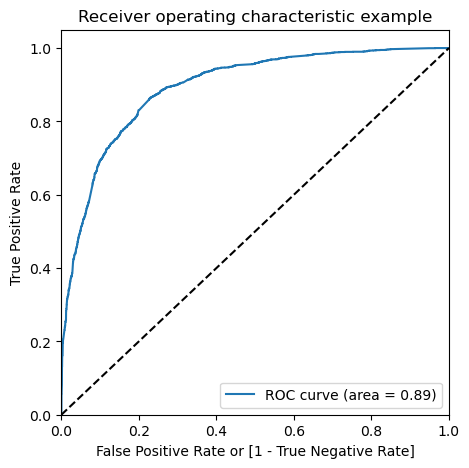

In [121]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Convert_Prob)

##### The ROC curve has an area of 0.89 which indicates the model is a good predictive model

### Finding the optimal cutoff point
 - The probability cutoff was randomly determined to be 0.5 for convenience, we will find out the optimal cutoff now

In [122]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Convert_Prob,Converted,Hot_Lead_ID,Predictions,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.858528,1,1032,1,1,1,1,1,1,1,1,1,1,0
1,0.268127,0,6535,0,1,1,1,0,0,0,0,0,0,0
2,0.817857,1,6238,1,1,1,1,1,1,1,1,1,1,0
3,0.934950,1,3190,1,1,1,1,1,1,1,1,1,1,1
4,0.067921,0,712,0,1,0,0,0,0,0,0,0,0,0


In [123]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385579  1.000000  0.000000
0.1   0.1  0.638403  0.973114  0.428356
0.2   0.2  0.760019  0.920947  0.659028
0.3   0.3  0.801176  0.872793  0.756233
0.4   0.4  0.814792  0.782905  0.834802
0.5   0.5  0.820362  0.714687  0.886678
0.6   0.6  0.810769  0.644462  0.915135
0.7   0.7  0.784775  0.531701  0.943591
0.8   0.8  0.760173  0.430578  0.967011
0.9   0.9  0.714529  0.278892  0.987912


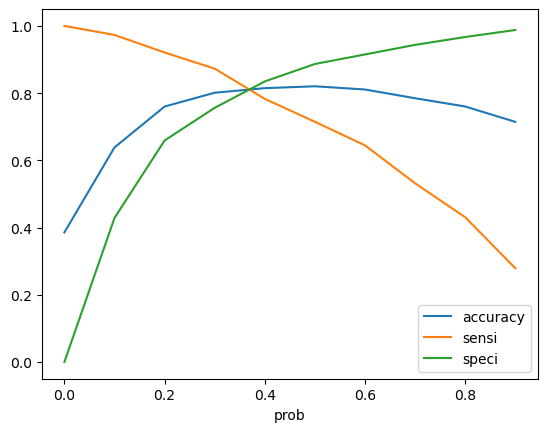

In [124]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### from the above curve, we can see that a cutoff of ~38 would yield a best tradeoff between sensitivity and specificity with ideal accuracy above 80%, hence making predictions using cutoff

In [125]:
y_train_pred_final['Pred_Score'] = y_train_pred_final['Convert_Prob']*100

In [126]:
y_train_pred_final['Predictions'] = y_train_pred_final.Pred_Score.map(lambda x: 1 if x > 38 else 0) #creating a new column
#predictions will show 1 or converted if Convert_Prob is >0.375 else will show 0 or not converted
y_train_pred_final.head()

,Convert_Prob,Converted,Hot_Lead_ID,Predictions,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Pred_Score
0,0.858528,1,1032,1,1,1,1,1,1,1,1,1,1,0,85.852849
1,0.268127,0,6535,0,1,1,1,0,0,0,0,0,0,0,26.812687
2,0.817857,1,6238,1,1,1,1,1,1,1,1,1,1,0,81.785743
3,0.934950,1,3190,1,1,1,1,1,1,1,1,1,1,1,93.494976
4,0.067921,0,712,0,1,0,0,0,0,0,0,0,0,0,6.792144


In [127]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predictions))

0.8118520810768993


In [128]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predictions)
print(confusion2)

[[3267  704]
 [ 512 1980]]


In [129]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [130]:
# Let's see the sensitivity of our logistic regression model
sensitivity = TP / float(TP+FN)
print(sensitivity)

0.7945425361155698


In [131]:
# Let's see the specificity of our logistic regression model
specificity = TN / float(TN+FP)
print(specificity)

0.8227146814404432


In [132]:
# Calculate false postive rate (FPR) - predicting conversion when lead has not converted
FPR = FP/ float(TN+FP)
print(FPR)

0.1772853185595568


In [133]:
# positive predictive value (PPV)
PPR = TP / float(TP+FP)
print (PPR)

0.7377049180327869


In [134]:
# Negative predictive value (NPV)
NPV = TN / float(TN+ FN)
print (NPV)

0.8645144218047103


In [135]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_pred_final.Converted, y_train_pred_final.Predictions)

0.7377049180327869

In [136]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predictions)

0.7945425361155698

In [137]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.Predictions

(0       1
 1       0
 2       1
 3       1
 4       0
        ..
 6458    1
 6459    1
 6460    0
 6461    0
 6462    0
 Name: Converted, Length: 6463, dtype: int64,
 0       1
 1       0
 2       1
 3       1
 4       0
        ..
 6458    1
 6459    1
 6460    0
 6461    1
 6462    0
 Name: Predictions, Length: 6463, dtype: int64)

In [138]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Convert_Prob)

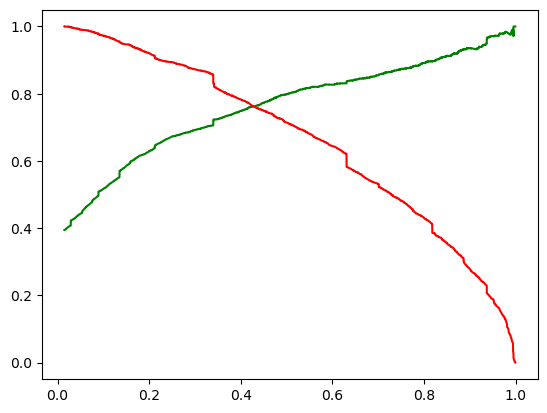

In [139]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### Although, we were able to find the optimum cutoff from the sensitivity, specificity and accuracy curve, but a precision of ~80% could not be reached, which was the main purpose of the machine learning model

 - Hence we need to keep on iterating the cutoff to reach a precision of 80% in hot leads detection where atleast 80% of the hot leads are actually converted


In [140]:
y_train_pred_final['Predictions'] = y_train_pred_final.Pred_Score.map(lambda x: 1 if x > 42 else 0) #modifying cutoff for 80% precision
y_train_pred_final.head()

,Convert_Prob,Converted,Hot_Lead_ID,Predictions,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Pred_Score
0,0.858528,1,1032,1,1,1,1,1,1,1,1,1,1,0,85.852849
1,0.268127,0,6535,0,1,1,1,0,0,0,0,0,0,0,26.812687
2,0.817857,1,6238,1,1,1,1,1,1,1,1,1,1,0,81.785743
3,0.934950,1,3190,1,1,1,1,1,1,1,1,1,1,1,93.494976
4,0.067921,0,712,0,1,0,0,0,0,0,0,0,0,0,6.792144


In [141]:
y_train_pred_final['Predictions'] = y_train_pred_final.Pred_Score.map(lambda x: 1 if x > 50.5 else 0) #modifying cutoff for 80% precision
y_train_pred_final.head()

,Convert_Prob,Converted,Hot_Lead_ID,Predictions,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Pred_Score
0,0.858528,1,1032,1,1,1,1,1,1,1,1,1,1,0,85.852849
1,0.268127,0,6535,0,1,1,1,0,0,0,0,0,0,0,26.812687
2,0.817857,1,6238,1,1,1,1,1,1,1,1,1,1,0,81.785743
3,0.934950,1,3190,1,1,1,1,1,1,1,1,1,1,1,93.494976
4,0.067921,0,712,0,1,0,0,0,0,0,0,0,0,0,6.792144


In [142]:
# Let's check the precision of detecting the actual leads from hot leads
precision_score(y_train_pred_final.Converted, y_train_pred_final.Predictions)

0.8007230004518753

In [143]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predictions)

0.7110754414125201

### We see from above that a cutoff of pred_score of 50.5 is a good place to have a desired precision of ~80% and also a good recall of ~71%

In [144]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predictions))

confusion3 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predictions)
print(confusion3)

#Calculating the rest of the metrics with the determined cutoff
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

0.8203620609624014
[[3530  441]
 [ 720 1772]]


In [145]:
# Let's see the sensitivity of our final logistic regression model
sensitivity = TP / float(TP+FN)
print(sensitivity)

0.7110754414125201


In [146]:
# Let's see the specificity of our logistic regression model
specificity = TN / float(TN+FP)
print(specificity)

0.8889448501636867


In [147]:
# Calculate false postive rate (FPR) - predicting conversion when lead has not converted
FPR = FP/ float(TN+FP)
print(FPR)

0.11105514983631327


In [148]:
# positive predictive value (PPV)
PPR = TP / float(TP+FP)
print (PPR)

0.8007230004518753


In [149]:
# Negative predictive value (NPV)
NPV = TN / float(TN+ FN)
print (NPV)

0.8305882352941176


In [150]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predictions))

0.8203620609624014


#### From here we observe that there is a high positive predictive rate, which means the ~80% of the predicted hot leads are actually hot leads with low false positive detection,  which is the main purpose of the exercise

### Moving onto test set predictions

In [151]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

In [152]:
X_test = X_test[cols]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,Lead_Source_Olark Chat,Lead_Source_Welingak Website,Last_Activity_Converted to Lead,Last_Activity_Olark Chat Conversation,Last_Activity_SMS Sent,Curr_occ_Occupation NA,Curr_occ_Working Professional,Last_N_Activity_Had a Phone Conversation,Last_N_Activity_Modified,Last_N_Activity_Unreachable
4869,0,0.046512,0.581426,0.125000,1,0,0,0,0,0,0,0,1,0,0,0
8687,0,0.116279,0.636004,0.312500,1,0,0,0,0,0,1,0,0,0,0,0
3719,0,0.046512,0.063380,0.125000,0,0,0,0,0,0,1,0,0,0,0,0
3511,0,0.186047,0.446743,0.166875,1,0,0,0,0,0,0,1,0,0,0,0
2508,0,0.116279,0.049296,0.312500,1,0,0,0,0,0,1,0,0,0,0,0


In [153]:
X_test.describe() #checking if rescaling done correctly

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,Lead_Source_Olark Chat,Lead_Source_Welingak Website,Last_Activity_Converted to Lead,Last_Activity_Olark Chat Conversation,Last_Activity_SMS Sent,Curr_occ_Occupation NA,Curr_occ_Working Professional,Last_N_Activity_Had a Phone Conversation,Last_N_Activity_Modified,Last_N_Activity_Unreachable
count,2770.000000,2770.000000,2770.000000,2770.000000,2770.000000,2770.000000,2770.000000,2770.000000,2770.000000,2770.000000,2770.000000,2770.000000,2770.000000,2770.000000,2770.000000,2770.000000
mean,0.077617,0.079154,0.215917,0.145713,0.533574,0.074368,0.192780,0.015523,0.048014,0.105415,0.294224,0.295668,0.072924,0.001444,0.378700,0.004332
std,0.267617,0.081442,0.242175,0.127706,0.498962,0.262417,0.394553,0.123645,0.213835,0.307143,0.455775,0.456425,0.260059,0.037980,0.485151,0.065688
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.023256,0.002751,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.069767,0.113336,0.125000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.116279,0.402289,0.187500,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,0.674419,0.975792,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [154]:
X_test_sm = sm.add_constant(X_test)

In [155]:
y_test_pred = res.predict(X_test_sm) #making predictions on test set

In [156]:
y_test_pred[:10]

4869    0.956084
8687    0.877600
3719    0.454431
3511    0.288958
2508    0.333111
7812    0.359871
435     0.178725
7654    0.346715
4065    0.910196
2306    0.060871
dtype: float64

In [157]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [158]:
# Let's see the head
y_pred_1.head()

,0
4869,0.956084
8687,0.877600
3719,0.454431
3511,0.288958
2508,0.333111


In [159]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [160]:
# Putting CustID to index
y_test_df['Hot_Lead_ID'] = y_test_df.index

In [161]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [162]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [163]:
y_pred_final.head()

,Converted,Hot_Lead_ID,0
0,1,4869,0.956084
1,1,8687,0.877600
2,0,3719,0.454431
3,1,3511,0.288958
4,1,2508,0.333111


In [164]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Convert_Prob'})

In [165]:
y_pred_final.head()

,Converted,Hot_Lead_ID,Convert_Prob
0,1,4869,0.956084
1,1,8687,0.877600
2,0,3719,0.454431
3,1,3511,0.288958
4,1,2508,0.333111


In [166]:
# Rearranging the columns
y_pred_final = y_pred_final[['Hot_Lead_ID','Converted','Convert_Prob']]
# Let's see the head of y_pred_final
y_pred_final.head()

,Hot_Lead_ID,Converted,Convert_Prob
0,4869,1,0.956084
1,8687,1,0.877600
2,3719,0,0.454431
3,3511,1,0.288958
4,2508,1,0.333111


In [167]:
y_pred_final['Pred_Score'] = y_pred_final['Convert_Prob']*100
y_pred_final.head()

,Hot_Lead_ID,Converted,Convert_Prob,Pred_Score
0,4869,1,0.956084,95.608431
1,8687,1,0.877600,87.759954
2,3719,0,0.454431,45.443052
3,3511,1,0.288958,28.895848
4,2508,1,0.333111,33.311096


In [168]:
y_pred_final['final_predictions'] = y_pred_final.Pred_Score.map(lambda x: 1 if x > 50.5 else 0) # score as found out from train set


In [169]:
y_pred_final.head()

,Hot_Lead_ID,Converted,Convert_Prob,Pred_Score,final_predictions
0,4869,1,0.956084,95.608431,1
1,8687,1,0.877600,87.759954,1
2,3719,0,0.454431,45.443052,0
3,3511,1,0.288958,28.895848,0
4,2508,1,0.333111,33.311096,0


In [170]:
# Let's check the precision of detecting the actual leads from hot leads
precision_score(y_pred_final.Converted, y_pred_final.final_predictions)

0.8086283185840708

In [171]:
recall_score(y_pred_final.Converted, y_pred_final.final_predictions)

0.6850984067478912

### Hence we see an overall convertion rate of ~81% in the test set but a recall of ~69%,  which is not bad but can be improved upon by trading off with the required conversion rate among the hot leads, which would mean lowering the Pred_score cutoff

In [172]:
# Let us check the other metrics

confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predictions)
print(confusion_test)

#Calculating the rest of the metrics with the determined cutoff
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives


[[1530  173]
 [ 336  731]]


In [173]:
# Let's see the sensitivity of our final logistic regression model
sensitivity = TP / float(TP+FN)
print(sensitivity)

0.6850984067478912


In [174]:
# Let's see the specificity of our logistic regression model
specificity = TN / float(TN+FP)
print(specificity)

0.8984145625366999


In [175]:
# Calculate false postive rate (FPR) - predicting conversion when lead has not converted
FPR = FP/ float(TN+FP)
print(FPR)

0.10158543746330007


In [176]:
# positive predictive value (PPV)
PPV = TP / float(TP+FP)
print (PPV)

0.8086283185840708


In [177]:
# Negative predictive value (NPV)
NPV = TN / float(TN+ FN)
print (NPV)

0.819935691318328


In [178]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predictions))

0.8203620609624014


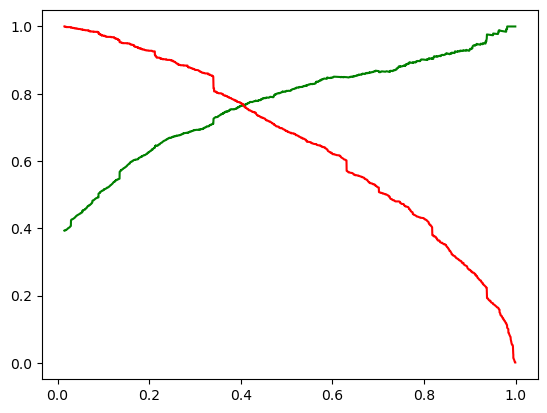

In [179]:
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Convert_Prob) #plotting the precision-recall tradeoff

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Final Observations and recommendations

- Since, conversion rate among the hot leads were the most important requirement of the business, the main metrics of focus was Precision, Positive Predictive Values and overall accuracy which seemed to satisfy the ballpark value for both the test and train sets, have listed the values below for reference
 - Train set: Precision = 80%; Positive Predictive Value = 80%; Overall Accuracy = 82%; False Positive Rate = 11%
 - Test set : Precision = 81%; Positive Predictive Value = 81%; Overall Accuracy = 82%; False Positive Rate = 10%


- Also False Positive Rate was low ~10% in the test set, which is a good number since the business does not want to spend resources on false leads

#### Coming to the model and the best variables, the model was finalised after 6 iterations with 16 variables and an ROC curve area of 0.89, which signifies good predictive power of the model.

#### The most significant three variables were:
- Total Time Spent on Website: coefficient = 4.5407
- Last Notable Activity Having A Phone Conversation: coefficient = 3.2288
- Lead Origin Lead Add Form: coefficient = 3.1102

The above variables increase the probability of conversion the most in decreasing order from top to bottom, hence recommended to pay more attention to

#### Variables affecting conversion rate the most in a negative way were:
- Do Not Email: coefficient = -1.4622
- Page Views Per Visit: coefficient = -1.4207
- Current Occupation Not Available: coefficient = -1.1921

The above variables decrease the probability of conversion the most in decreasing order from top to bottom, hence recommended to pay less attention to


### It is also recommended to have an overall conversion rate to be a bit lower than 80% from the hot leads, since it is a trade-off between the conversion rate of hot leads and identification of true leads, increasing the precision might lead to not capturing some leads which might actually have been converted.